In [3]:
import pandas as pd
import warnings
import io
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('BTC-USD.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())

         Date         Open         High          Low        Close  \
0  2019-03-01  3853.757080  3907.795410  3851.692383  3859.583740   
1  2019-03-02  3855.318115  3874.607422  3832.127930  3864.415039   
2  2019-03-03  3862.266113  3875.483643  3836.905762  3847.175781   
3  2019-03-04  3845.091553  3867.381836  3733.749756  3761.557129   
4  2019-03-05  3759.832520  3903.916748  3745.183105  3896.375000   

     Adj Close       Volume  
0  3859.583740   7661247975  
1  3864.415039   7578786076  
2  3847.175781   7253558152  
3  3761.557129   9029175788  
4  3896.375000  10174126415  
               Open          High           Low         Close     Adj Close  \
count   1920.000000   1920.000000   1920.000000   1920.000000   1920.000000   
mean   27902.507679  28534.560803  27232.559959  27933.663833  27933.663833   
std    17911.531661  18349.312106  17417.716206  17923.062895  17923.062895   
min     3759.832520   3867.381836   3733.749756   3761.557129   3761.557129   
25%    104

In [4]:
# Check the columns to ensure 'Date' is present
print(df.columns)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the dataframe to confirm changes
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-03-01  3853.757080  3907.795410  3851.692383  3859.583740  3859.583740   
2019-03-02  3855.318115  3874.607422  3832.127930  3864.415039  3864.415039   
2019-03-03  3862.266113  3875.483643  3836.905762  3847.175781  3847.175781   
2019-03-04  3845.091553  3867.381836  3733.749756  3761.557129  3761.557129   
2019-03-05  3759.832520  3903.916748  3745.183105  3896.375000  3896.375000   

                 Volume  
Date                     
2019-03-01   7661247975  
2019-03-02   7578786076  
2019-03-03   7253558152  
2019-03-04   9029175788  
2019-03-05  10174126415  


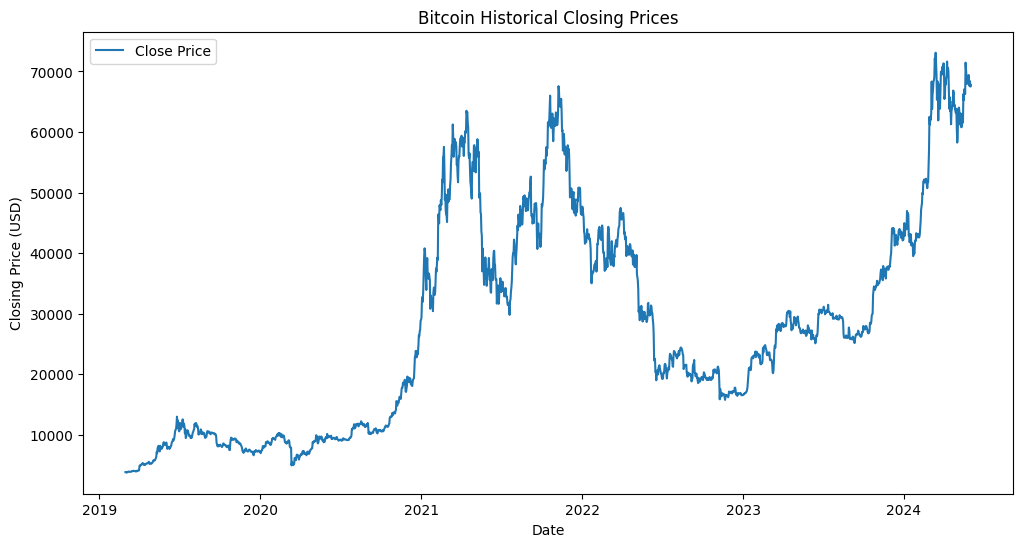

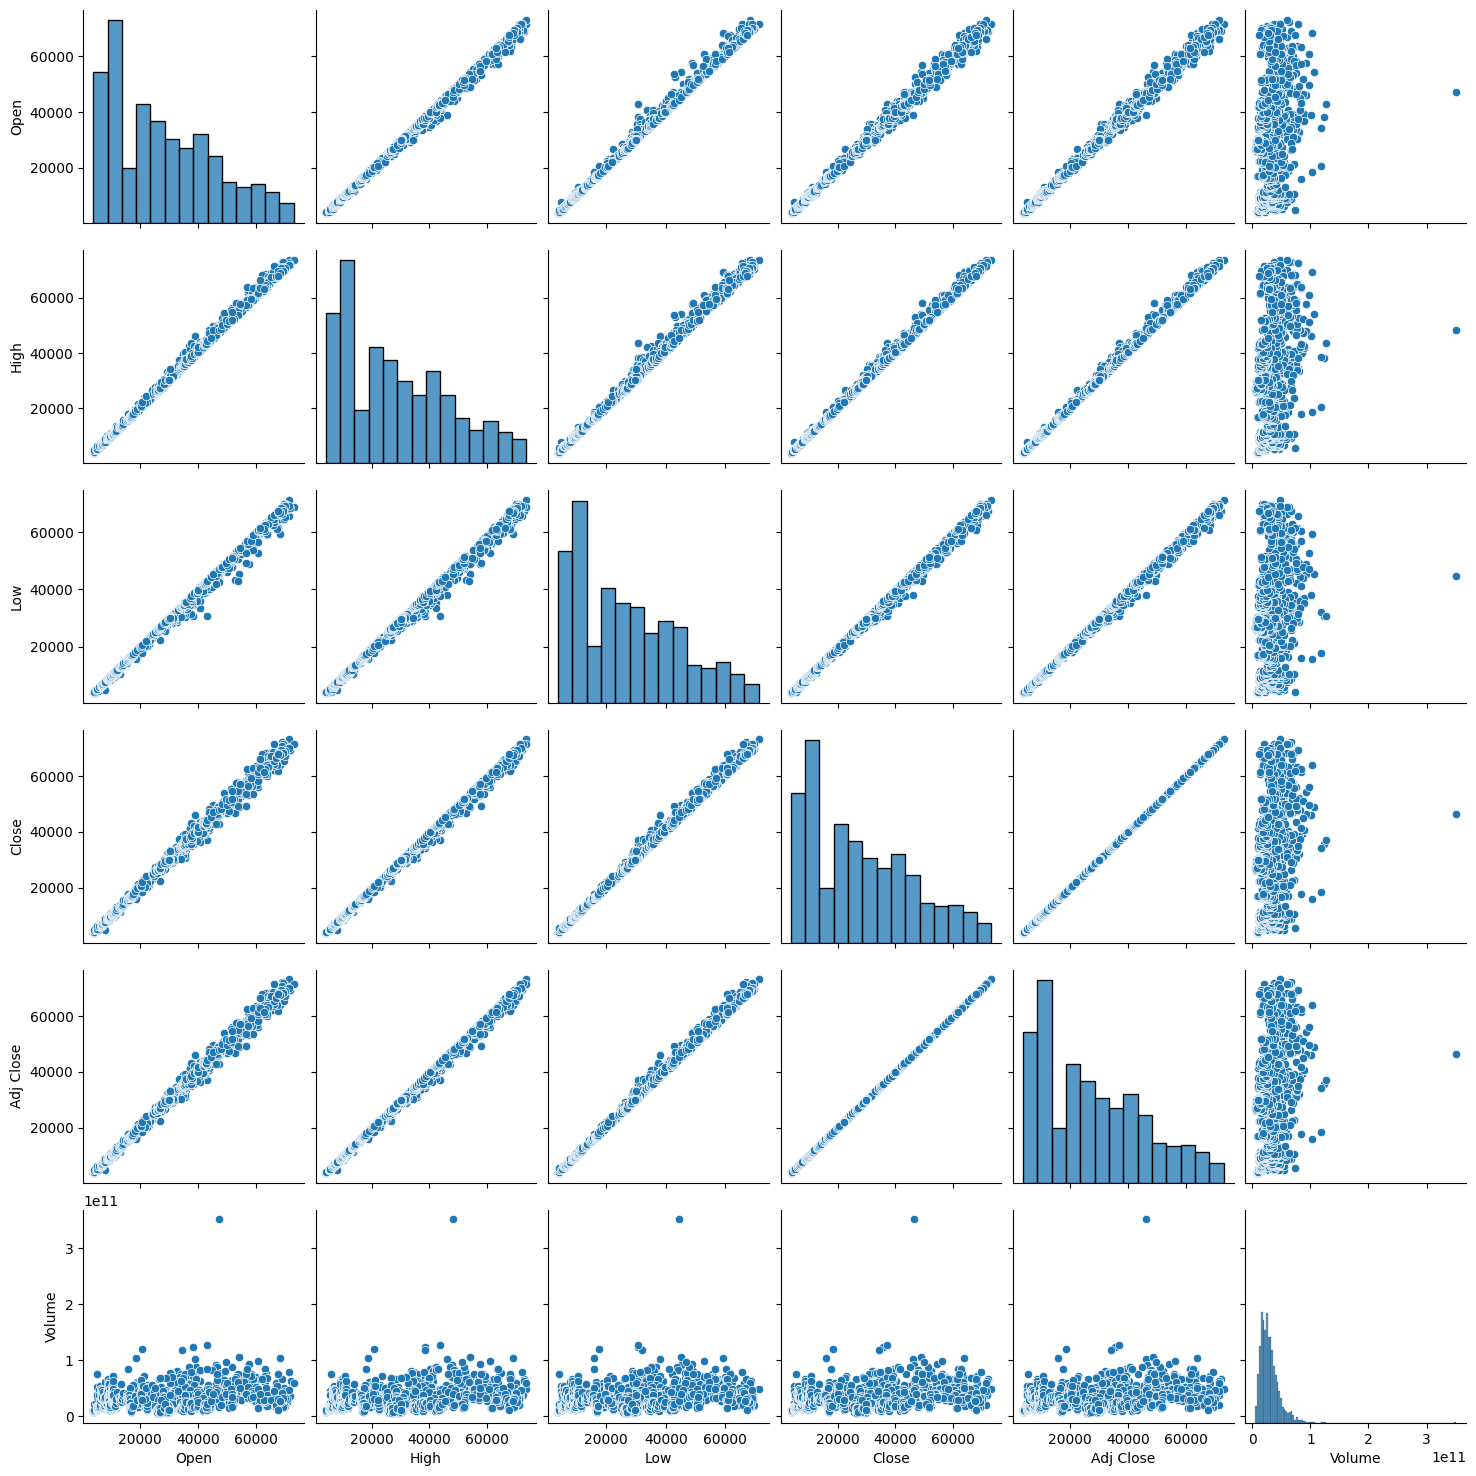

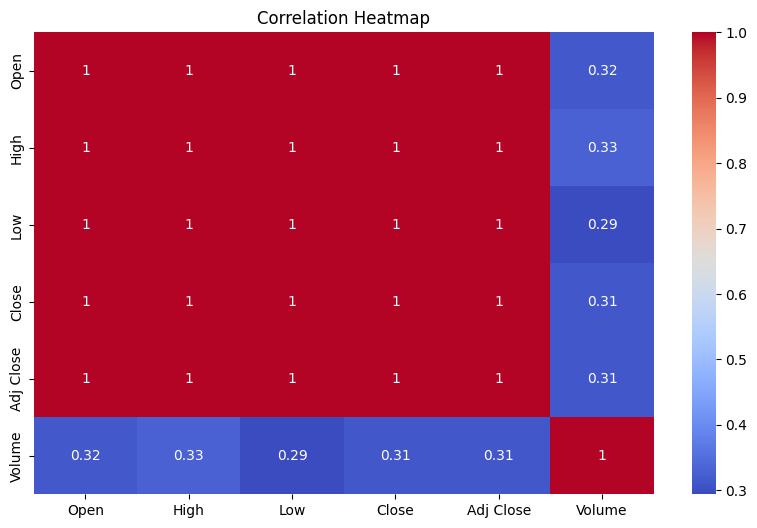

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the historical closing prices of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Pair plot to explore relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

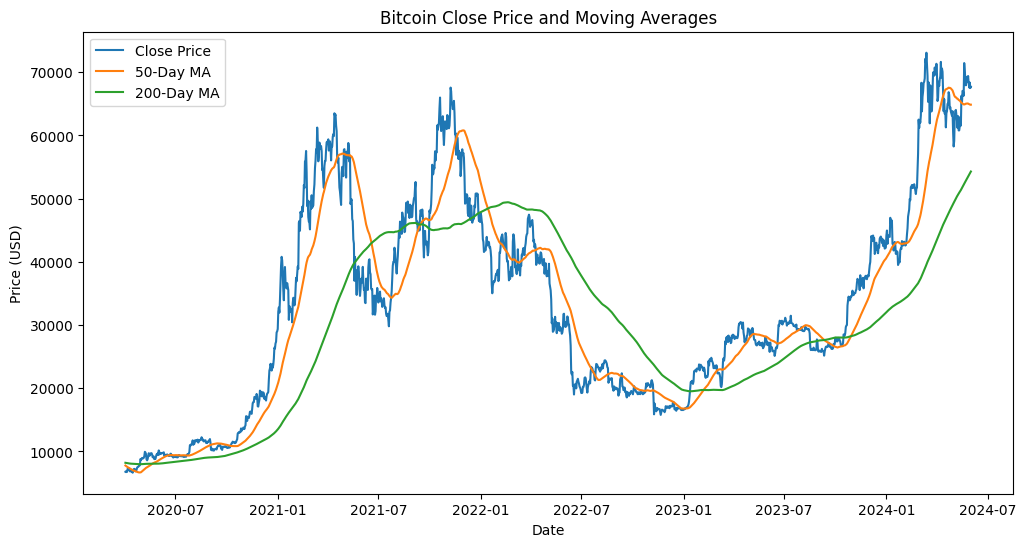

In [7]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate moving averages
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

# Drop NaN values created by rolling windows
df.dropna(inplace=True)

# Visualize the new features
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['50-Day MA'], label='50-Day MA')
plt.plot(df['200-Day MA'], label='200-Day MA')
plt.title('Bitcoin Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Mean Squared Error: 144484.88849924528
R^2 Score: 0.9994715635322619


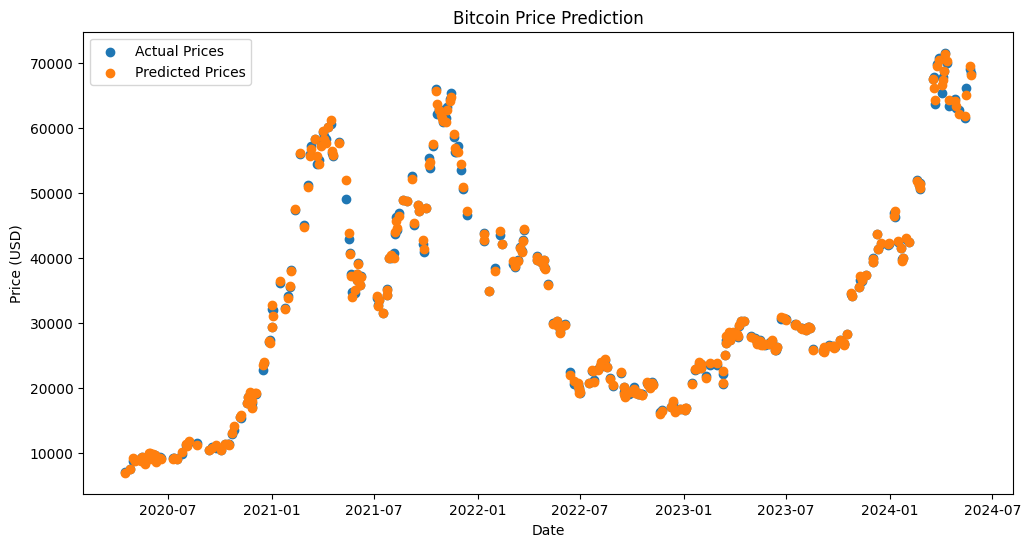

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the feature set and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

models comparisons 7-2 split


In [29]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [30]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)



In [32]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[38701.9536577  38710.46494055 38718.9762234  38727.48750626
 38735.99878911 38744.51007196 38753.02135482 38761.53263767
 38770.04392052 38778.55520338 38787.06648623 38795.57776908
 38804.08905194 38812.60033479 38821.11161764 38829.6229005
 38838.13418335 38846.6454662  38855.15674906 38863.66803191
 38872.17931476 38880.69059762 38889.20188047 38897.71316332
 38906.22444618 38914.73572903 38923.24701189 38931.75829474
 38940.26957759 38948.78086045]


In [33]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 14544.987900054677


Testing RMSE: 14544.987900054677


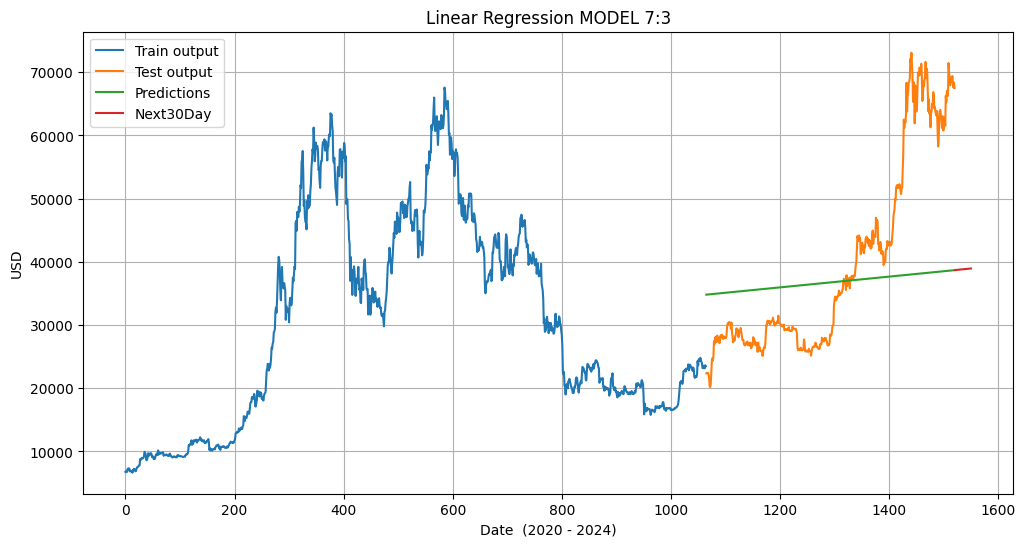

In [34]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date  (2020 - 2024)')
plt.ylabel('USD')
plt.show()

In [35]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 11409.66
MAPE: 27.36%
MSE: 211556673.01
RMSE: 14544.99


90 days

Predicted closing prices for the next 90 days:
[38701.9536577  38710.46494055 38718.9762234  38727.48750626
 38735.99878911 38744.51007196 38753.02135482 38761.53263767
 38770.04392052 38778.55520338 38787.06648623 38795.57776908
 38804.08905194 38812.60033479 38821.11161764 38829.6229005
 38838.13418335 38846.6454662  38855.15674906 38863.66803191
 38872.17931476 38880.69059762 38889.20188047 38897.71316332
 38906.22444618 38914.73572903 38923.24701189 38931.75829474
 38940.26957759 38948.78086045 38957.2921433  38965.80342615
 38974.31470901 38982.82599186 38991.33727471 38999.84855757
 39008.35984042 39016.87112327 39025.38240613 39033.89368898
 39042.40497183 39050.91625469 39059.42753754 39067.93882039
 39076.45010325 39084.9613861  39093.47266895 39101.98395181
 39110.49523466 39119.00651751 39127.51780037 39136.02908322
 39144.54036607 39153.05164893 39161.56293178 39170.07421463
 39178.58549749 39187.09678034 39195.6080632  39204.11934605
 39212.6306289  39221.14191176 39229.65

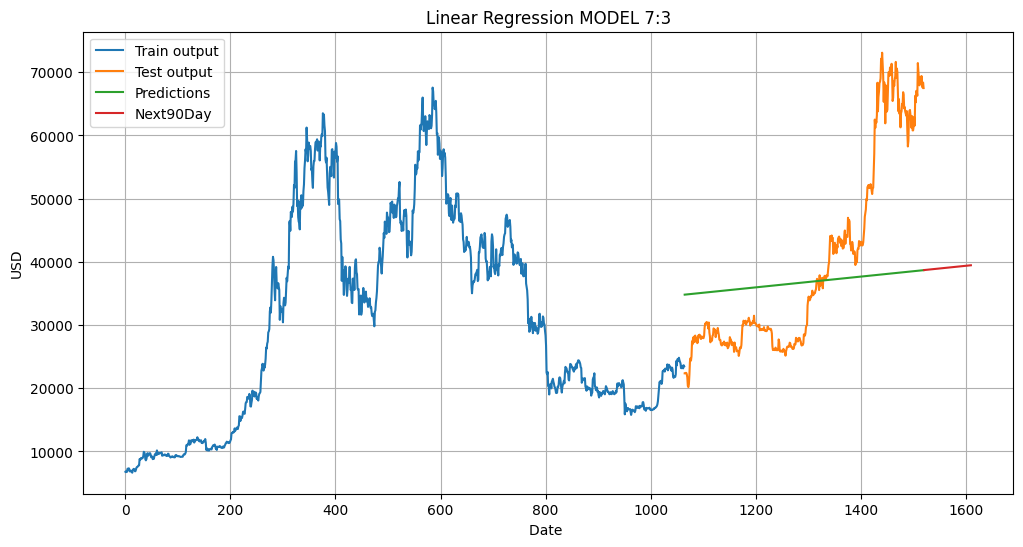

In [36]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

based models comparasion 6:4


Predicted closing prices for the next 30 days:
[60900.84308725 60927.89603521 60954.94898318 60982.00193114
 61009.0548791  61036.10782707 61063.16077503 61090.21372299
 61117.26667096 61144.31961892 61171.37256688 61198.42551485
 61225.47846281 61252.53141077 61279.58435874 61306.6373067
 61333.69025467 61360.74320263 61387.79615059 61414.84909856
 61441.90204652 61468.95499448 61496.00794245 61523.06089041
 61550.11383837 61577.16678634 61604.2197343  61631.27268226
 61658.32563023 61685.37857819]
Validation RMSE: 6833.147360714836
Testing RMSE: 21536.49974158148
Validation RMSE: 6833.147360714836
Testing RMSE: 21536.49974158148


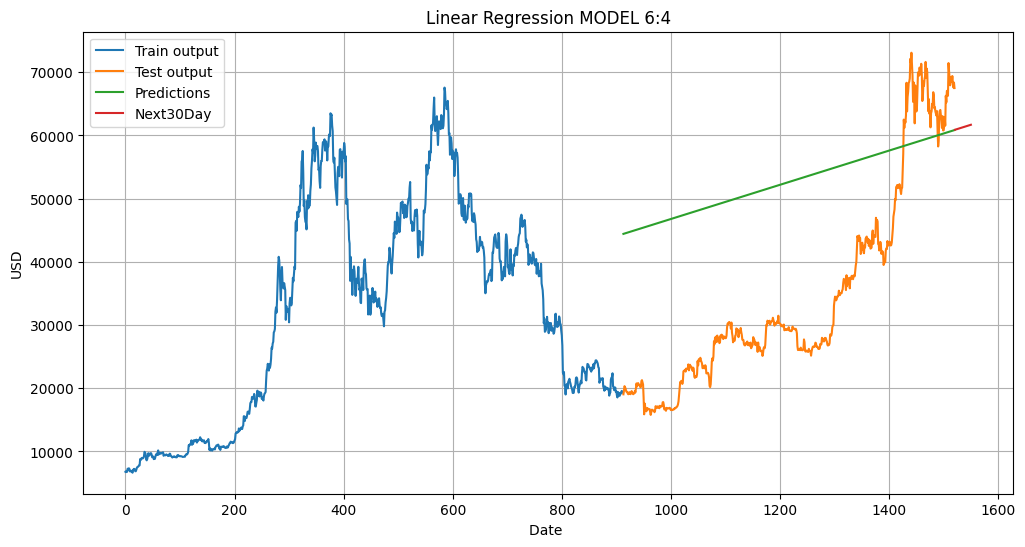

In [20]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [21]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 20061.75
MAPE: 78.36%
MSE: 463820821.12
RMSE: 21536.50


Predicted closing prices for the next 90 days:
[60900.84308725 60927.89603521 60954.94898318 60982.00193114
 61009.0548791  61036.10782707 61063.16077503 61090.21372299
 61117.26667096 61144.31961892 61171.37256688 61198.42551485
 61225.47846281 61252.53141077 61279.58435874 61306.6373067
 61333.69025467 61360.74320263 61387.79615059 61414.84909856
 61441.90204652 61468.95499448 61496.00794245 61523.06089041
 61550.11383837 61577.16678634 61604.2197343  61631.27268226
 61658.32563023 61685.37857819 61712.43152616 61739.48447412
 61766.53742208 61793.59037005 61820.64331801 61847.69626597
 61874.74921394 61901.8021619  61928.85510986 61955.90805783
 61982.96100579 62010.01395375 62037.06690172 62064.11984968
 62091.17279765 62118.22574561 62145.27869357 62172.33164154
 62199.3845895  62226.43753746 62253.49048543 62280.54343339
 62307.59638135 62334.64932932 62361.70227728 62388.75522524
 62415.80817321 62442.86112117 62469.91406914 62496.9670171
 62524.01996506 62551.07291303 62578.125

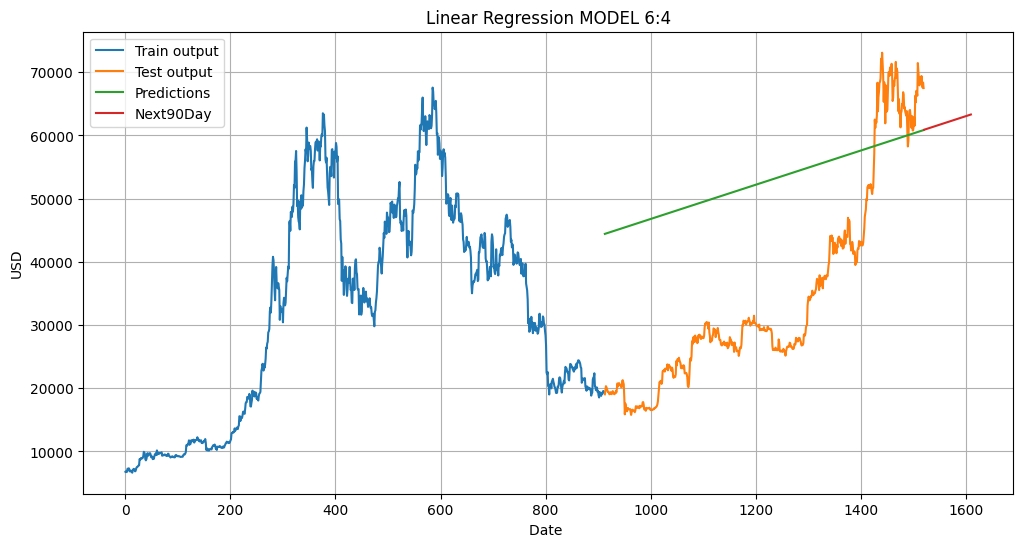

In [37]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

model: 8:2

Predicted closing prices for the next 30 days:
[34087.9287161  34092.4212703  34096.9138245  34101.40637871
 34105.89893291 34110.39148711 34114.88404132 34119.37659552
 34123.86914972 34128.36170392 34132.85425813 34137.34681233
 34141.83936653 34146.33192073 34150.82447494 34155.31702914
 34159.80958334 34164.30213754 34168.79469175 34173.28724595
 34177.77980015 34182.27235436 34186.76490856 34191.25746276
 34195.75001696 34200.24257117 34204.73512537 34209.22767957
 34213.72023377 34218.21278798]
Validation RMSE: 33623.50133810361
Testing RMSE: 19433.114178853808
Validation RMSE: 33623.50133810361
Testing RMSE: 19433.114178853808


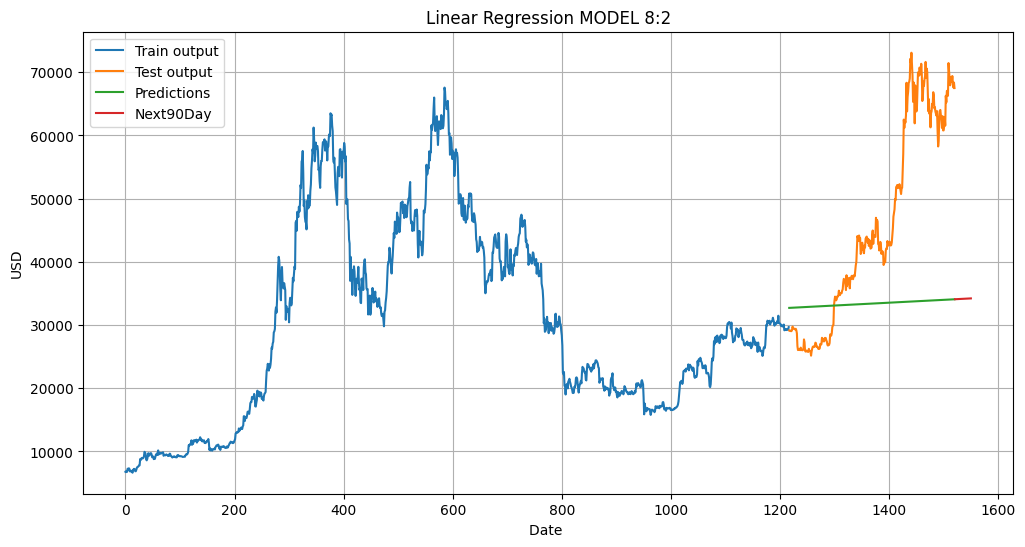

In [38]:
#2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

Predicted closing prices for the next 90 days:
[34087.9287161  34092.4212703  34096.9138245  34101.40637871
 34105.89893291 34110.39148711 34114.88404132 34119.37659552
 34123.86914972 34128.36170392 34132.85425813 34137.34681233
 34141.83936653 34146.33192073 34150.82447494 34155.31702914
 34159.80958334 34164.30213754 34168.79469175 34173.28724595
 34177.77980015 34182.27235436 34186.76490856 34191.25746276
 34195.75001696 34200.24257117 34204.73512537 34209.22767957
 34213.72023377 34218.21278798 34222.70534218 34227.19789638
 34231.69045058 34236.18300479 34240.67555899 34245.16811319
 34249.6606674  34254.1532216  34258.6457758  34263.13833
 34267.63088421 34272.12343841 34276.61599261 34281.10854681
 34285.60110102 34290.09365522 34294.58620942 34299.07876362
 34303.57131783 34308.06387203 34312.55642623 34317.04898044
 34321.54153464 34326.03408884 34330.52664304 34335.01919725
 34339.51175145 34344.00430565 34348.49685985 34352.98941406
 34357.48196826 34361.97452246 34366.4670

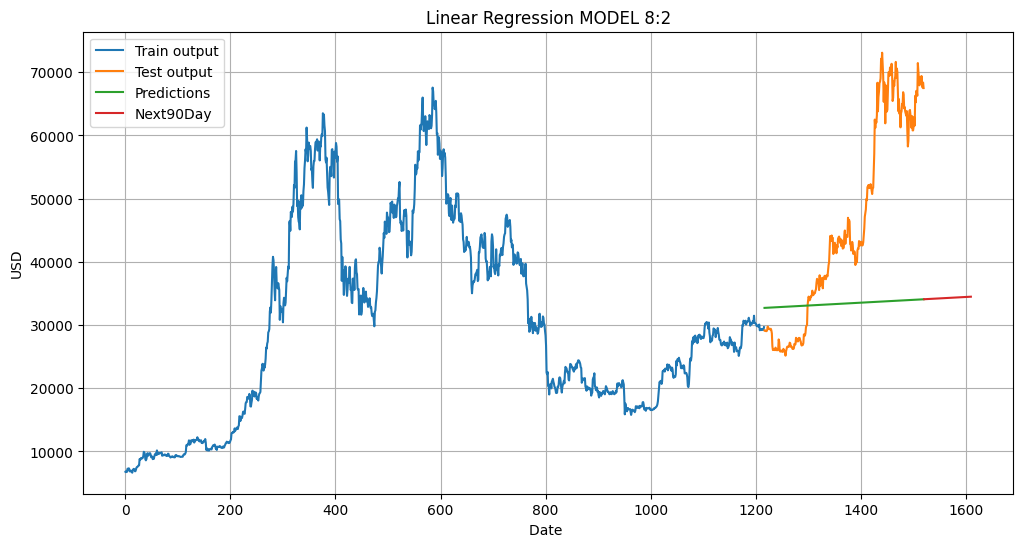

In [39]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [26]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 15144.79
MAPE: 28.85%
MSE: 377645926.69
RMSE: 19433.11
